## Определение тональности текста отзывов на фильмы IMDB с помощью одномерной сверточной нейросети

Учебный курс "[Нейросети для анализа текстов](https://www.asozykin.ru/courses/nnpython)".

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Не забудьте подключить GPU, чтобы сеть обучалась быстрее (Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU).

In [0]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Загружаем данные

In [0]:
max_words=10000

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17465344/17464789 [==============================] - 0s 0us/step


## Подготовка данных для обучения

In [0]:
maxlen = 200

In [0]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [6]:
x_train[5002]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,  103,   51,   13,  197,   16,    6, 4796,
        239,    7,  107,  555,   11,  132,   39, 8921, 1872,  138,   16,
       4093, 1768, 2959,   34, 1620,    2,   11,    4,  755,   12,   43,
        286,    4,  172,  209,    2,    5, 5938,   17, 1000,   34, 1768,
        279,   29, 3892,   89,  338,    4,  114,   16, 1240, 1747,  103,
       3844, 3819,    8,  169, 2875,  112, 7062,   34,  160,  132,   29,
        100,   24,  535,  101,  250,    8,  858,   15,  196,   19,   57,
       3154,   39,   90,    5,   24,  169, 3533,   

## Создание нейронной сети

In [0]:
model = Sequential()
model.add(Embedding(max_words, 8, input_length=maxlen))
model.add(Conv1D(100, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(200, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 8)            80000     
_________________________________________________________________
conv1d (Conv1D)              (None, 196, 100)          4100      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 100)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 94, 200)           100200    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 47, 200)           0         
_________________________________________________________________
flatten (Flatten)            (None, 9400)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

## Обучаем нейронную сеть

In [10]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=5,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/5
176/176 [==============================] - 2s 12ms/step - loss: 0.4756 - accuracy: 0.7299 - val_loss: 0.3177 - val_accuracy: 0.8660
Epoch 2/5
176/176 [==============================] - 1s 8ms/step - loss: 0.2267 - accuracy: 0.9122 - val_loss: 0.2993 - val_accuracy: 0.8752
Epoch 3/5
176/176 [==============================] - 1s 8ms/step - loss: 0.1635 - accuracy: 0.9386 - val_loss: 0.3212 - val_accuracy: 0.8728
Epoch 4/5
176/176 [==============================] - 1s 8ms/step - loss: 0.1194 - accuracy: 0.9564 - val_loss: 0.3761 - val_accuracy: 0.8728
Epoch 5/5
176/176 [==============================] - 1s 8ms/step - loss: 0.0888 - accuracy: 0.9697 - val_loss: 0.4303 - val_accuracy: 0.8624


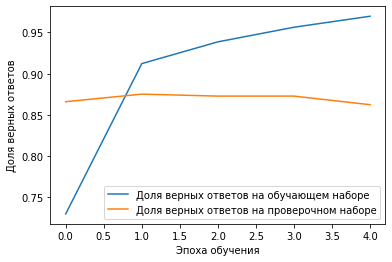

In [11]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Проверяем работу сети на тестовом наборе данных

In [12]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 2s 2ms/step - loss: 0.4716 - accuracy: 0.8504


## Архитектуры нейронных сетей для анализа текстов

1. [Определение тональности отзывов на фильмы из базы IMDB с помощью простых рекуррентных нейросетей](https://colab.research.google.com/drive/19RAxAnIV0fDXAcE1T23TPkzi4ZPFQXdB).
2. [Определение тональности отзывов на фильмы из базы IMDB с помощью сетей LSTM](https://colab.research.google.com/drive/1FQjetRIkWYxmm87JKUbVSJrRS2vNLPpV).
3. [Определение тональности отзывов на фильмы из базы IMDB с помощью сетей GRU](https://colab.research.google.com/drive/1IGJPwFkTdpbyagQ5jiIRJBA01xlfc18t).